## Resource Model metrics and comparisons

Work with Arches-based resource models (RM)

Load GitHub repository and requirements

In [ ]:
# Download and install latest version of Arches graph parser
!rm cultural-heritage -R
!git clone https://github.com/achp-project/cultural-heritage.git
!pip install -r cultural-heritage/graph-parser/requirements.txt
%cd /content/cultural-heritage/graph-parser/
import graph_mixer as gm

Load libraries

In [ ]:
import os
import urllib.request
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact, interactive
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import re
from IPython.display import HTML
from pyvis import network as net
import folium
import json

Projects extents (map)

In [ ]:
gm.projects_extent()

List of available RMs

In [36]:
# Download uploaded cultural heritage partners graphs
!rm inputResourceModels -R
!mkdir -p inputResourceModels
remote_source_files = gm.rm_list()
remote_source_files

Select two RMs to compare (checkboxes)

In [ ]:
checkboxes_dict = gm.generate_checkboxes_from_dict(remote_source_files)
interactive_widget = interactive(gm.get_and_print_checked_values, **checkboxes_dict)
display(interactive_widget)

Retrieve and show selected RM keys

In [44]:
gm.rm_selected(checkboxes_dict, remote_source_files)

Selected projects: ['MAHSA', 'MAEASAM']
Selected RMs: {'MAHSA': 'https://raw.githubusercontent.com/achp-project/prj-mahsa/main/resource-models/Heritage%20Location%20Resource%20Model.json', 'MAEASAM': 'https://raw.githubusercontent.com/achp-project/prj-maeasam/main/Site.json'}


Create subgraph and comparison dataframe csv files by running [graph-parser.py](https://github.com/achp-project/cultural-heritage/blob/main/graph-parser/graph_parser.py) and [graph-comparator.py](https://github.com/achp-project/cultural-heritage/blob/main/graph-parser/graph_comparator.py)

In [ ]:
!python /content/cultural-heritage/graph-parser/graph_comparator.py -d -m list -o subgraphMetrics.csv inputResourceModels/*.json
!python /content/cultural-heritage/graph-parser/graph_comparator.py -d -m compare -o comparisonMetrics.csv inputResourceModels/*.json
subgraph_metrics = pd.read_csv('subgraphMetrics.csv')
comparison_metrics = pd.read_csv('comparisonMetrics.csv')

Show subgraph metrics (see: [documentation](https://github.com/achp-project/cultural-heritage/blob/main/graph-parser/README.md#minimal_subgraph_data))

In [46]:
subgraph_metrics = gm.subgraph_metrics()
subgraph_metrics

,G,source,target,property,source_id,target_id,source_name,target_name
0,MAHS_Site,E28_Conceptual_Object,E42_Identifier,P1_is_identified_by,E28_Conceptual_Object_MAHS_Site,E42_Identifier_MAHS_Site,Citation 2,Citation URL
1,MAHS_Site,E84_Information_Carrier,E35_Title,P102_has_title,E84_Information_Carrier_MAHS_Site,E35_Title_MAHS_Site,Information Carrier 2,Caption
2,MAHS_Site,E84_Information_Carrier,E55_Type,P2_has_type,E84_Information_Carrier_MAHS_Site,E55_Type_MAHS_Site,Information Carrier 2,Information Carrier Format Type
3,MAHS_Site,E27_Site,E55_Type,P2_has_type,E27_Site_MAHS_Site,E55_Type_MAHS_Site,Site,Functional Classification
4,MAHS_Site,E27_Site,E55_Type,P2_has_type,E27_Site_MAHS_Site,E55_Type_MAHS_Site,Site,Keyword
...,...,...,...,...,...,...,...,...
255,MAPSS_Heritage%20Place%20(3),E27_Site,E42_Identifier,P48_has_preferred_identifier,E27_Site_MAPSS_Heritage%20Place%20(3),E42_Identifier_MAPSS_Heritage%20Place%20(3),Heritage Place,MAPSS_HP_ID
256,MAPSS_Heritage%20Place%20(3),S4_Observation,E29_Design_or_Procedure,O8_observed,S4_Observation_MAPSS_Heritage%20Place%20(3),E29_Design_or_Procedure_MAPSS_Heritage%20Place...,Heritage Place Component Observation,Component Construction Technique
257,MAPSS_Heritage%20Place%20(3),I2_Belief,E3_Condition_State,P117i_includes,I2_Belief_MAPSS_Heritage%20Place%20(3),E3_Condition_State_MAPSS_Heritage%20Place%20(3),Disturbance Effect Belief,Damage Effect
258,MAPSS_Heritage%20Place%20(3),E53_Place,E55_Type,P2_has_type,E53_Place_MAPSS_Heritage%20Place%20(3),E55_Type_MAPSS_Heritage%20Place%20(3),Geography,Heritage Feature Orientation Type


Compararison metrics (see: [documentation](https://github.com/achp-project/cultural-heritage/blob/main/graph-parser/README.md#graph_comparison_data))

In [47]:
comparison_metrics = gm.comparison_metrics()
comparison_metrics

,G,source,target,property,source_id,target_id
0,both,E3_Condition_State,E55_Type,P2_has_type,E3_Condition_State_both,E55_Type_both
1,both,E53_Place,E55_Type,P2_has_type,E53_Place_both,E55_Type_both
2,both,E13_Attribute_Assignment,E62_String,P3_has_note,E13_Attribute_Assignment_both,E62_String_both
3,both,E16_Measurement,E55_Type,P2_has_type,E16_Measurement_both,E55_Type_both
4,both,E41_Appellation,E55_Type,P2_has_type,E41_Appellation_both,E55_Type_both
5,both,E55_Type,E55_Type,P2_has_type,E55_Type_both,E55_Type_both
6,both,E54_Dimension,E60_Number,P90_has_value,E54_Dimension_both,E60_Number_both
7,both,E53_Place,E53_Place,P89_falls_within,E53_Place_both,E53_Place_both


### Graphs



Graph graphical parameters, complete dataframe and functions

Plot individual graphs

In [ ]:
gm.plot_all_G(subgraph_metrics, comparison_metrics)

Plot combined graphs

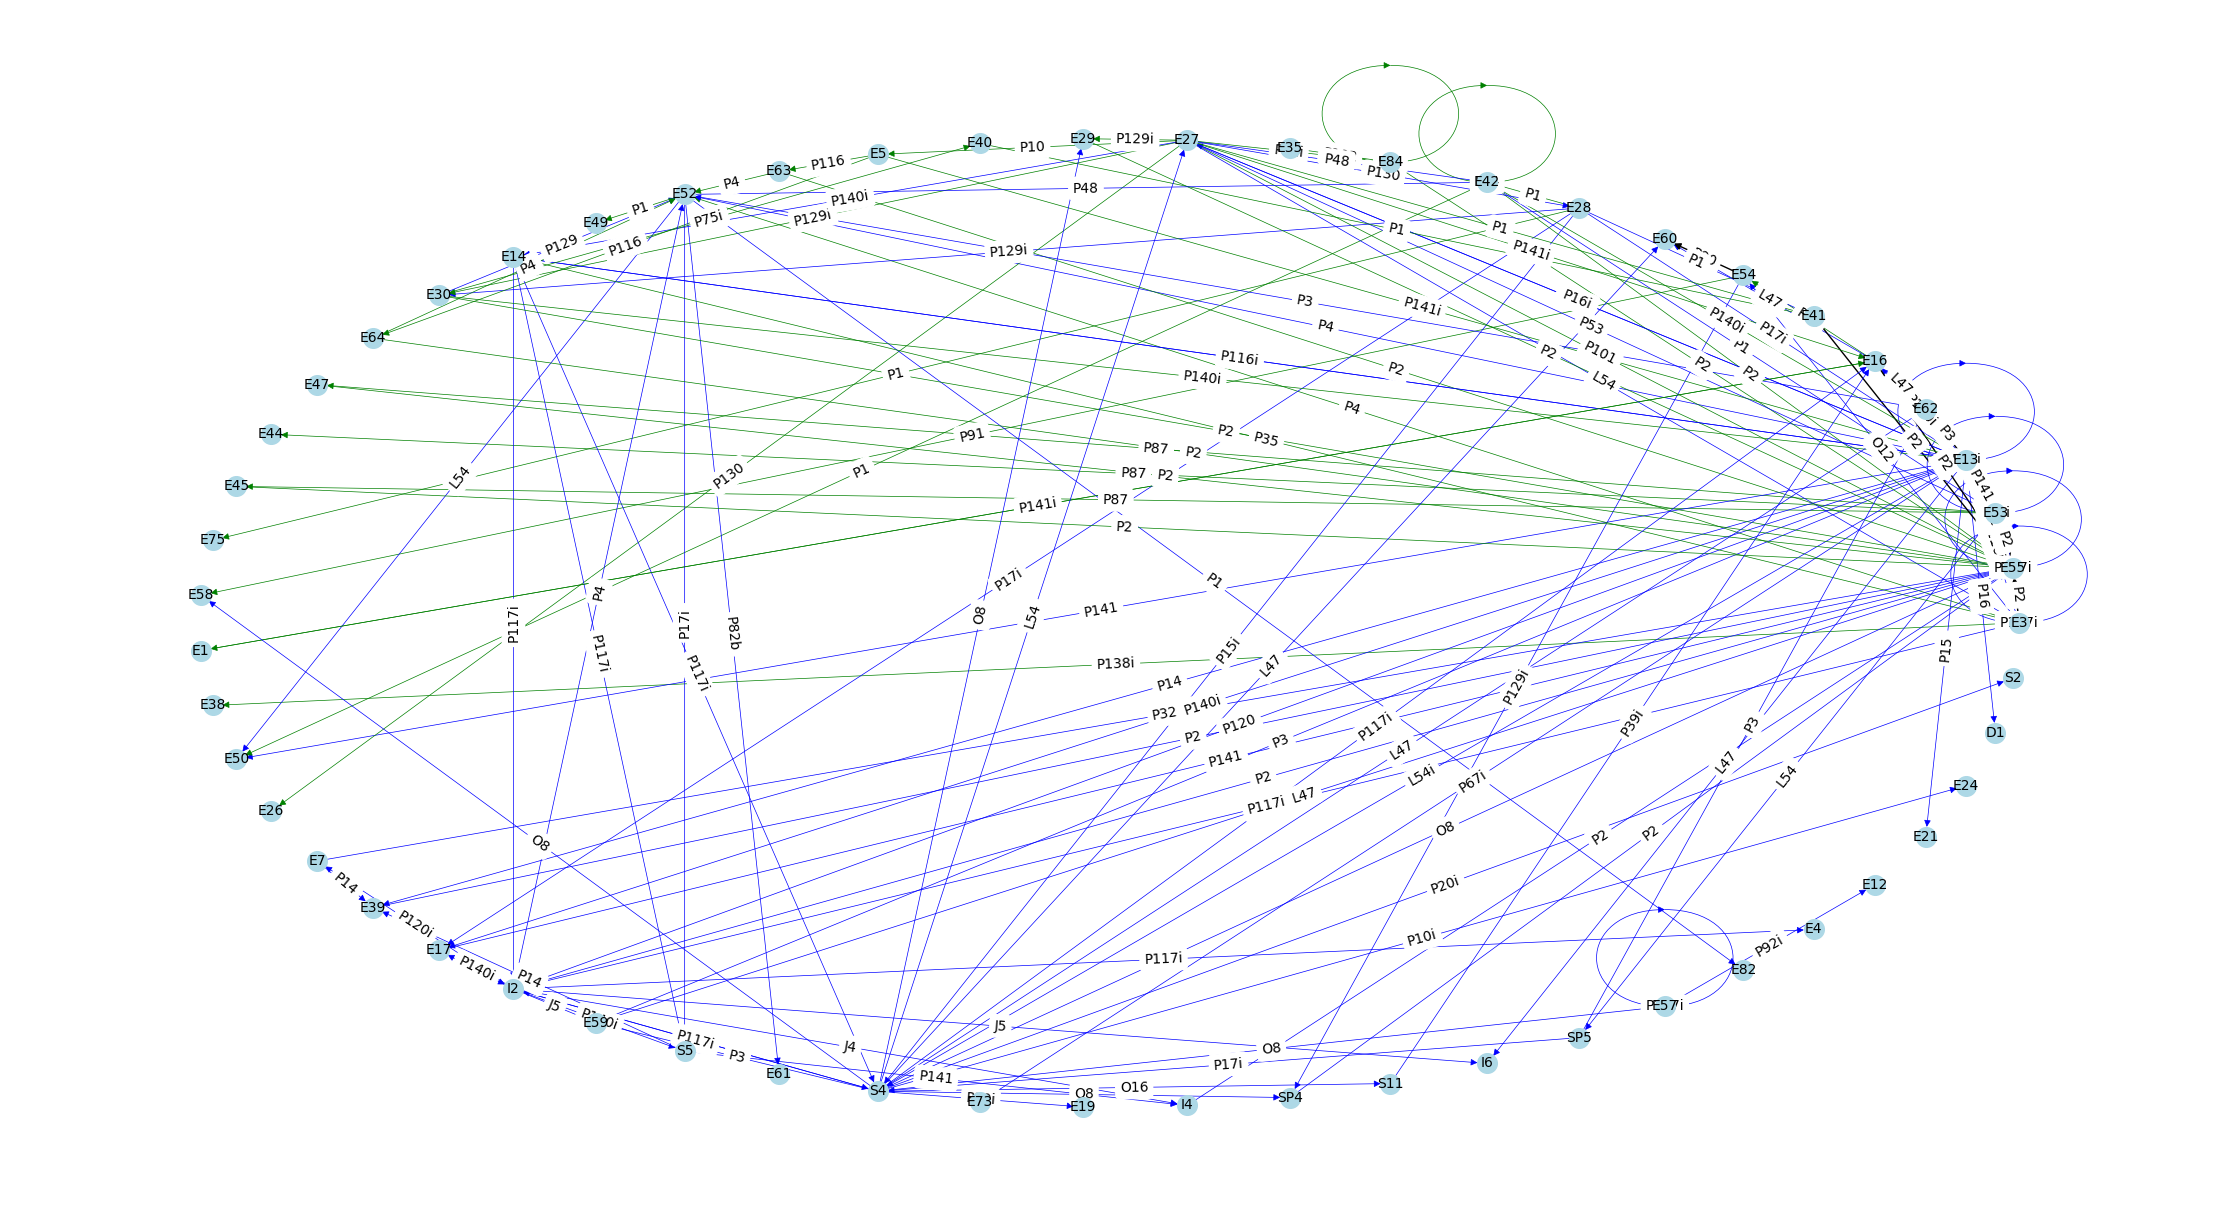

In [62]:
G = gm.all_nx_G(subgraph_metrics, comparison_metrics)
gm.plot_all_nx_G(G)

Plot interactive graphs

In [63]:
gm.plot_all_pyvis_G(G, "pyvis-example")